# Optimization Methods: Assignment 6

---

Part 1 & Part 2 will do it later.

## Part 3: Programming problems

In [1]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

## Problem 1: Active Constraints

Consider the following constrained and linear optimisation problem:

$$
\begin{aligned}
\min_{x \in \mathbb{R}^2} \quad & 2x_1 + x_2 \\
\text{s.t.} \quad
& x_1 + x_2 \geq 3 \\
& x_1 + 2x_2 \leq 6 \\
& x_1 \geq 1 \\
& x_2 \geq 1
\end{aligned}
$$

### 1. $is\_ci\_verified$

For each constraint, write a function $is\_ci\_verified$ that checks for any point $x$ if the constraint is verified at x (this function should return a boolean).

If a point satisfies a constraint, the constraint is verified at that point.

In [2]:
# x1 + x2 ≥ 3
def is_c1_verified(x):
    return x[0] + x[1] >= 3

# x1 + 2x2 ≤ 6
def is_c2_verified(x):
    return x[0] + 2 * x[1] <= 6

# x1 ≥ 1
def is_c3_verified(x):
    return x[0] >= 1

# x2 ≥ 1
def is_c4_verified(x):
    return x[1] >= 1

In [3]:
# Example
x = (2, 2)

print(is_c1_verified(x))
print(is_c2_verified(x))
print(is_c3_verified(x))
print(is_c4_verified(x))

True
True
True
True


### 2. $is\_feasible$

Using the previous functions, write a function $is\_feasible$ that checks if a point $x$ is feasible (this function should return a boolean).

A point $x = (x_1, x_2)$ is feasible if it satisfies all the constraints of the optimization problem.

In [4]:
def is_feasible(x):
    return (
        is_c1_verified(x) and
        is_c2_verified(x) and
        is_c3_verified(x) and
        is_c4_verified(x)
    )

### 3. Test it on $x^0 = (1,2)$ and $x^1 = (3,1.2)$. Are $x^0$ and $x^1$ feasible?

In [5]:
x0 = (1, 2)
x1 = (3, 1.2)

print("x0 is feasible:", is_feasible(x0))
print("x1 is feasible:", is_feasible(x1))

x0 is feasible: True
x1 is feasible: True


They are both feasbile.

### 4. $is\_ci\_active$

For each constraint, write a function $is\_ci\_active$ that checks for any point $x$ if the constraint is active at $x$ (this function should return a boolean).

A constraint is active at a point $x$ if the constraint is satisfied with equality at that point. This means the inequality becomes an equality at $x$.

In [6]:
# Using tolerance because it handles better floating point numbers

# x1 + x2 ≥ 3 → active if x1 + x2 = 3
def is_c1_active(x):
    return abs(x[0] + x[1] - 3) < 1e-8

# x1 + 2x2 ≤ 6 → active if x1 + 2x2 = 6
def is_c2_active(x):
    return abs(x[0] + 2 * x[1] - 6) < 1e-8

# x1 ≥ 1 → active if x1 = 1
def is_c3_active(x):
    return abs(x[0] - 1) < 1e-8

# x2 ≥ 1 → active if x2 = 1
def is_c4_active(x):
    return abs(x[1] - 1) < 1e-8

### 5. Test these functions on $x^0$ and $x^1$.

Which constraints are active at $x^0$? Same question for $x^1$.

In [7]:
def get_active_constraints(x):
    active = []
    if is_c1_active(x): active.append("c1")
    if is_c2_active(x): active.append("c2")
    if is_c3_active(x): active.append("c3")
    if is_c4_active(x): active.append("c4")
    return active

In [8]:
x0 = (1, 2)
x1 = (3, 1.2)

print("Active constraints at x0:", get_active_constraints(x0))
print("Active constraints at x1:", get_active_constraints(x1))

Active constraints at x0: ['c1', 'c3']
Active constraints at x1: []


### 6. We now want to plot the feasible region $Ω$ of this problem.

Since the constraints are linear, each of them defines a halfspace and the intersection of the four halfspaces is the feasible region.

To find the halfspace defined by each constraint, we can first find the equation of the line dividing the space into 2 halfspaces.

For instance, for the first constraint $x1 + x2 ≥ 3$, the corresponding line is $x1 + x2 = 3$ which is the same as $x2 = 3 − x1$.

We can thus plot the latter line and the corresponding halfspace is $x2 ≥ 3 − x1$, i.e., the region “above” the line.

Repeat this strategy for all four constraints and annotate in your plot the location of $Ω$.

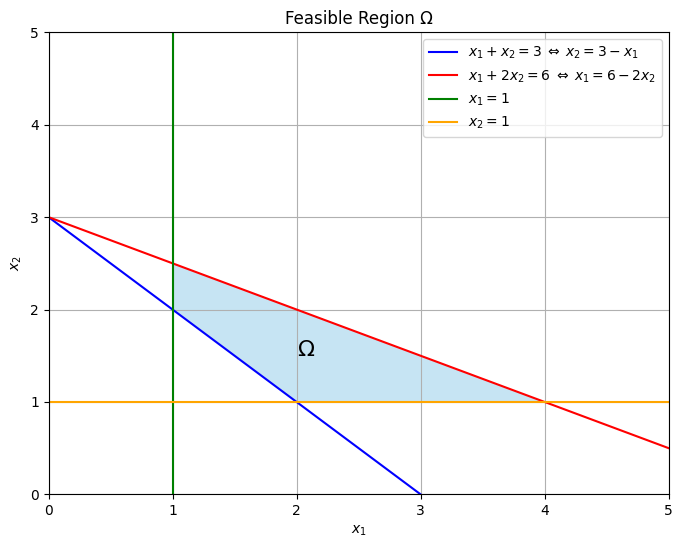

In [9]:
x1 = np.linspace(0, 5, 400)
x2 = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

# Constraints
c1 = (X1 + X2 >= 3)
c2 = (X1 + 2*X2 <= 6)
c3 = (X1 >= 1)
c4 = (X2 >= 1)

# Feasible region (intersection of all constraints)
feasible = c1 & c2 & c3 & c4

plt.figure(figsize=(8, 6))
plt.title("Feasible Region Ω")

plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["#a0d2eb"], alpha=0.6)

plt.plot(x1, 3 - x1, label=r"$x_1 + x_2 = 3 \;\Leftrightarrow\; x_2 = 3 - x_1$", color='blue')
plt.plot(x1, (6 - x1) / 2, label=r"$x_1 + 2x_2 = 6 \;\Leftrightarrow\; x_1 = 6 - 2x_2$", color='red')
plt.axvline(1, label=r"$x_1 = 1$", color='green')
plt.axhline(1, label=r"$x_2 = 1$", color='orange')

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)

plt.text(2, 1.5, r"$\Omega$", fontsize=16, color="black")

plt.show()


### 7. Add on the previous plot the location of the points $x^0$ and $x^1$.

Observe that $x^0$ belongs to the lines corresponding to the active constraints at $x^0$.

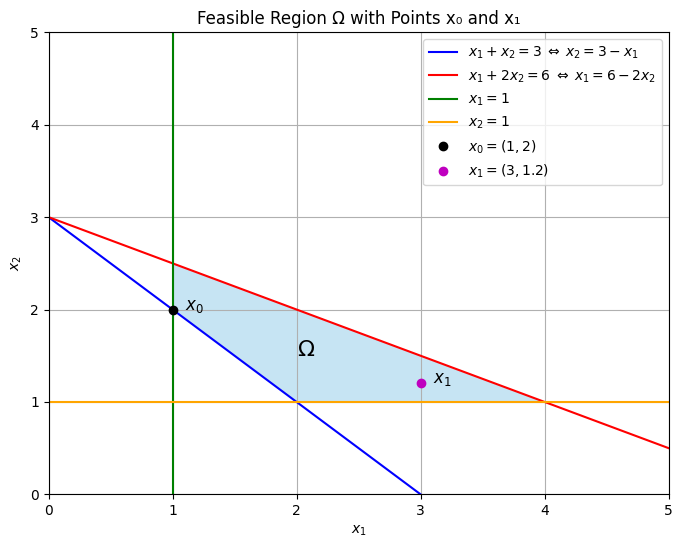

In [10]:
x1 = np.linspace(0, 5, 400)
x2 = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

c1 = (X1 + X2 >= 3)
c2 = (X1 + 2*X2 <= 6)
c3 = (X1 >= 1)
c4 = (X2 >= 1)

feasible = c1 & c2 & c3 & c4

# Points to plot
x0 = (1, 2)
x1_pt = (3, 1.2)

plt.figure(figsize=(8, 6))
plt.title("Feasible Region Ω with Points x₀ and x₁")

plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["#a0d2eb"], alpha=0.6)

plt.plot(x1, 3 - x1, label=r"$x_1 + x_2 = 3 \;\Leftrightarrow\; x_2 = 3 - x_1$", color='blue')
plt.plot(x1, (6 - x1) / 2, label=r"$x_1 + 2x_2 = 6 \;\Leftrightarrow\; x_1 = 6 - 2x_2$", color='red')
plt.axvline(1, label=r"$x_1 = 1$", color='green')
plt.axhline(1, label=r"$x_2 = 1$", color='orange')

plt.plot(*x0, 'ko', label=r"$x_0 = (1, 2)$")
plt.plot(*x1_pt, 'mo', label=r"$x_1 = (3, 1.2)$")

plt.text(x0[0] + 0.1, x0[1], r"$x_0$", fontsize=12)
plt.text(x1_pt[0] + 0.1, x1_pt[1], r"$x_1$", fontsize=12)

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.text(2, 1.5, r"$\Omega$", fontsize=16, color="black")

plt.show()

Earlier we verified that c1 and c3 are active constraints at $x^0$.

In fact, as we can see, $x^0$ belongs to both c1 and c3 lines.

### 8. We now want to determine the solution of this constrained problem.

Since the objective function is linear, for any scalar $b ∈ R, f(x) = b$ is the equation of a line.

Observe that this defines a family of parallel lines, indexed by different values of $b$. Thus, to find the optimum, we need to find $b$ such that at least one point of the line $f(x) = b$ falls in the feasible region.

Check that this happens for $b = 4$ and that $x^0$ is the global minimiser by plotting the corresponding line.

We are minimizing the linear objective function:

$$
f(x) = 2x_1 + x_2
$$

This function defines a family of lines of the form:

$$
2x_1 + x_2 = b, \quad \text{for } b \in \mathbb{R}
$$

Each value of $b$ corresponds to a level line of the objective function.

To find the minimum, we move the line $2x_1 + x_2 = b$ downward (in the direction of decreasing $f$), stopping when the line just touches the feasible region $\Omega$.

This happens when the line intersects the feasible region but does not fully pass through it. That point of contact is the global minimizer.

Let’s consider:

$$
2x_1 + x_2 = 4 \;\; \Leftrightarrow \;\; x_2 = 4 - 2x_1
$$

We’ll plot this line and see if it intersects the feasible region $\Omega$.

We also know from previous checks that:

- $x_0 = (1, 2)$ is feasible
- At $x_0$, we have: $f(x_0) = 2 \cdot 1 + 2 = 4$

Therefore, $x_0$ lies on the level line $f(x) = 4$, and if no other feasible point yields a smaller value, $x_0$ is the global minimizer.

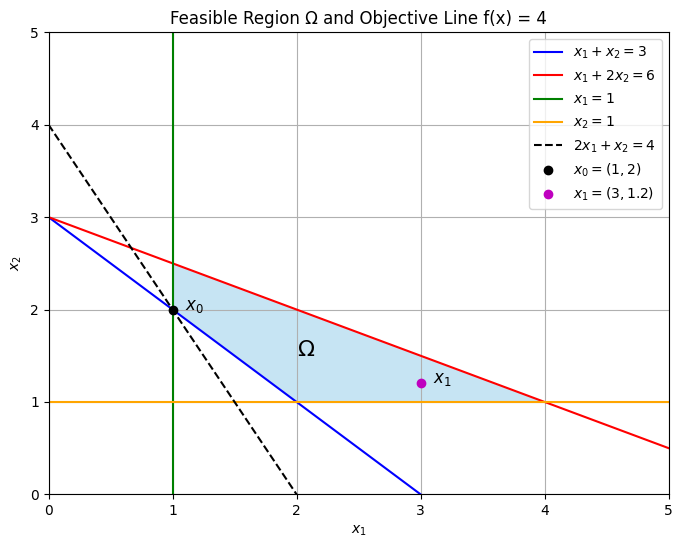

In [11]:
x1 = np.linspace(0, 5, 400)
x2 = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

# Constraints
c1 = (X1 + X2 >= 3)
c2 = (X1 + 2 * X2 <= 6)
c3 = (X1 >= 1)
c4 = (X2 >= 1)
feasible = c1 & c2 & c3 & c4

# Points
x0 = (1, 2)
x1_pt = (3, 1.2)

# Objective line: f(x) = 2x1 + x2 = 4 → x2 = 4 - 2x1
f_line_x2 = 4 - 2 * x1

plt.figure(figsize=(8, 6))
plt.title("Feasible Region Ω and Objective Line f(x) = 4")

plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["#a0d2eb"], alpha=0.6)

plt.plot(x1, 3 - x1, label=r"$x_1 + x_2 = 3$", color='blue')
plt.plot(x1, (6 - x1)/2, label=r"$x_1 + 2x_2 = 6$", color='red')
plt.axvline(1, label=r"$x_1 = 1$", color='green')
plt.axhline(1, label=r"$x_2 = 1$", color='orange')

# Objective function level line
plt.plot(x1, f_line_x2, 'k--', label=r"$2x_1 + x_2 = 4$")

plt.plot(*x0, 'ko', label=r"$x_0 = (1, 2)$")
plt.plot(*x1_pt, 'mo', label=r"$x_1 = (3, 1.2)$")
plt.text(x0[0] + 0.1, x0[1], r"$x_0$", fontsize=12)
plt.text(x1_pt[0] + 0.1, x1_pt[1], r"$x_1$", fontsize=12)

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.text(2, 1.5, r"$\Omega$", fontsize=16, color="black")

plt.show()

We can easily check that this is true in an easy way. In linear optimization problems (also known as Linear Programming), where:

- the objective function is linear,
- the constraints are linear inequalities,

The optimal solution, if it exists, lies at a vertex (corner point) of the feasible region.

This means we don’t need to evaluate every point, but we can just evaluate the objective function at the corner points of $\Omega$, and select the one with the smallest value.

Since our problem is relatively simple, let's do this double check.


In [12]:
# Evaluating the Objective Function f(x) = 2x₁ + x₂
def f(x):
    return 2 * x[0] + x[1]

# Define the points
corner_points = {
    "A (2, 2)": (2, 2),
    "B (4, 1)": (4, 1),
    "C (1, 3)": (1, 3),
    "D (1, 2)": (1, 2)
}

for name, pt in corner_points.items():
    print(f"f{x} at {name} = {f(pt)}")


f(2, 2) at A (2, 2) = 6
f(2, 2) at B (4, 1) = 9
f(2, 2) at C (1, 3) = 5
f(2, 2) at D (1, 2) = 4


In conclusion, the graphic method was absolutely correct and $x^0$ is the global minimizer (optimal solution) of the objective function.

## Problem 2 - KKT Conditions

Consider the following constrained problem:

$$
\begin{aligned}
\min_{x \in \mathbb{R}^2} \quad & x^2 \\
\text{s.t.} \quad
& 1 \leq x \leq 4
\end{aligned}
$$

### 1. General form

Re-write this problem in the general form given in the lectures by finding the constraint functions $ci$ and for each of them, define a function that compute $ci(x)$ for any point $x$.

To write this in the general constrained form, we express all constraints as inequality constraints of the type:

$$
c_i(x) \geq 0
$$

Or in the case of equality constraints:

$$
c_i(x) = 0
$$

We have two constraints:

- $x \geq 1$ can be written as: $c_1(x) = x - 1 \geq 0$

- $x \leq 4$ can be written as: $c_2(x) = 4 - x \geq 0$

There are no equality constraints in this problem ($E = \emptyset$).

In [13]:
# Objective function
def f(x):
    return x**2

# x ≥ 1 → x - 1 ≥ 0
def c1(x):
    return x - 1

# x ≤ 4 → 4 - x ≥ 0
def c2(x):
    return 4 - x

### 2. $is\_feasible$

Write a function $is\_feasible$ that checks if a point $x$ is feasible (this function should return a boolean).

I will call this function $is\_feasible2$ since so that we don't have any issue with the same function of the previous exercise.

Again, a point $x = (x_1, x_2, ..., x_n)$ is feasible if it satisfies all the constraints of the optimization problem.

In [14]:
def is_feasible2(x):
    return (c1(x) >= 0 and c2(x) >= 0)

### 3. Test this functions on $x^0 = 0$, $x^1 = 1$ and $x^2 = 3$.

In [15]:
x0 = 0
x1 = 1
x2 = 3

print(f"x0 = {x0}, feasible? {is_feasible2(x0)}")
print(f"x1 = {x1}, feasible? {is_feasible2(x1)}")
print(f"x2 = {x2}, feasible? {is_feasible2(x2)}")

x0 = 0, feasible? False
x1 = 1, feasible? True
x2 = 3, feasible? True


### 4. Define a function that computes the Lagragian for any point $x$ and vector of multipliers $λ$.

The Lagrangian is used to study optimization problems with constraints. Suppose we want to minimize a function $f(x)$ subject to one or more constraints:

- Equality constraints: $c_j(x) = 0$
- Inequality constraints: $c_i(x) \geq 0$

Instead of solving this problem directly, we combine the objective and the constraints into a **single function** called the **Lagrangian**:

For a problem like:

$$
\begin{aligned}
\min_{x \in \mathbb{R}^2} \quad & f(x) \\
\text{s.t.} \quad
& c_i(x) \geq 0 \\
& c_j(x) = 0
\end{aligned}
$$

we define the Lagrangian:

$$
\mathcal{L}(x, \lambda, \mu) = f(x) - \sum_{i} \lambda_i c_i(x) - \sum_{j} \mu_j c_j(x)
$$

- $\lambda_i \geq 0$: multipliers for **inequality** constraints
- $\mu_j \in \mathbb{R}$: multipliers for **equality** constraints

In our case we only have inequality constraints.

The Lagrangian is the foundation of the Karush-Kuhn-Tucker (KKT) conditions, which are necessary conditions for a point to be optimal (a minimizer) in a constrained problem.

Basically it transforms a constrained optimization problem into one where we can apply calculus, such as calculating the gradient.

In this case, for the problem:

$$
\begin{aligned}
\min_{x \in \mathbb{R}^2} \quad & x^2 \\
\text{s.t.} \quad
& x - 1 \geq 0 \\
& 4 - x \geq 0
\end{aligned}
$$

The Lagrangian is:

$$
\mathcal{L}(x, \lambda) = x^2 - \lambda_1(x - 1) - \lambda_2(4 - x)
$$

Later, we will use this Lagrangian to write the KKT conditions, which allow us to find the candidate optimal points.

In [16]:
def lagrangian(x, lambdas):
    λ1, λ2 = lambdas
    return f(x) - λ1 * c1(x) - λ2 * c2(x)

### 5. Define a function that computes the gradient of the Lagragian function with respect to $x$ and for any point $x$ and vector of multipliers $λ$.

We need to compute the gradient (derivative) of the Lagrangian:

$$
\mathcal{L}(x, \lambda) = x^2 - \lambda_1(x - 1) - \lambda_2(4 - x)
$$

Taking the derivative with respect to $x$:

$$
\frac{d}{dx} \mathcal{L}(x, \lambda) = 2x - \lambda_1 + \lambda_2
$$

This derivative will be used in the **KKT stationarity condition**.

In [17]:
def grad_lagrangian(x, lambdas):
    λ1, λ2 = lambdas
    return (2 * x) - λ1 + λ2

### 6. Check that the KKT conditions are verified at $x^* = 1$ and $λ^* = (0, 2)^T$.

Let $x^*$ be a candidate minimizer and $\lambda^* = (\lambda_1, \lambda_2)^T$ the corresponding multipliers.

Then the KKT conditions are:

1. **Stationarity**: $\nabla_x \mathcal{L}(x^*, \lambda^*) = 0$

2. **Primal feasibility**: $c_1(x^*) \geq 0, \quad c_2(x^*) \geq 0$

3. **Dual feasibility**: $\lambda_1 \geq 0, \quad \lambda_2 \geq 0$

4. **Complementary slackness**: $\lambda_1 \cdot c_1(x^*) = 0, \quad \lambda_2 \cdot c_2(x^*) = 0$

Let's check all four KKT conditions for $x^* = 1$ and $λ^* = (0, 2)^T$.

In [18]:
x_star = 1
lambdas_star = (0, 2)

# KKT checks
stationarity = grad_lagrangian(x_star, lambdas_star) == 0

primal_feasibility = (c1(x_star) >= 0 and c2(x_star) >= 0)

dual_feasibility = (lambdas_star[0] >= 0 and lambdas_star[1] >= 0)

complementary_slackness = (lambdas_star[0] * c1(x_star) == 0 and lambdas_star[1] * c2(x_star) == 0)

print(f"Stationarity: {stationarity}")
print(f"Primal feasibility: {primal_feasibility}")
print(f"Dual feasibility: {dual_feasibility}")
print(f"Complementary slackness: {complementary_slackness}")

Stationarity: False
Primal feasibility: True
Dual feasibility: True
Complementary slackness: False


At $x^* = 1$ and $λ^* = (0, 2)^T$ only two KKT conditions are verified.

In fact, at this point with those lambda values we have:

- $c_1(x) = x - 1 = 0$ → Constraint is active
- $c_2(x) = 4 - x = 3 > 0$ → Constraint is inactive

According to the last KKT condition:

> If a constraint is **inactive** (i.e., $c_i(x^*) > 0$), then the corresponding lambda multiplier must be zero:  
>  
> $\lambda_i \cdot c_i(x^*) = 0 \Rightarrow \lambda_i = 0$

But in this case $\lambda_2 = 2$ and $c_2(x^*) = 3$, which multiplied yield 6, violating the complementary slackness condition.

To satisfy all KKT conditions we should have had $x^* = 1$ and $\lambda^* = (2, 0)^T$ instead.

## Problem 3 - Feasible Directions

Consider a feasible set defined by $Ω = \{x ∈ \mathbb{R}^2: −x_0 + x_1 \leq 2, \quad x_0 + x_1 \leq 4, \quad x_0 \geq 0, \quad x1 \geq 1\}$.

We are given the feasible region:

$$
\Omega = \left\{ x \in \mathbb{R}^2 \; \middle| \;
\begin{aligned}
- x_0 + x_1 &\leq 2 \\
x_0 + x_1 &\leq 4 \\
x_0 &\geq 0 \\
x_1 &\geq 1
\end{aligned}
\right\}
$$

To write this in **standard form**, we express all constraints as:

$$
c_i(x) \geq 0
$$

The feasible set in standard form is:

$$
\Omega = \left\{ x \in \mathbb{R}^2 \; \middle| \;
\begin{aligned}
c_1(x) &= x_0 - x_1 + 2 \geq 0 \\
c_2(x) &= - x_0 - x_1 + 4 \geq 0 \\
c_3(x) &= x_0 \geq 0 \\
c_4(x) &= x_1 - 1 \geq 0
\end{aligned}
\right\}
$$

### 1. Draw the lines delimitating the feasible set and annotate the area corresponding to the feasible set.

We can rewrite the constraints to better visualize the half-spaces:

$$
x_0 - x_1 + 2 \geq 0 \quad \Leftrightarrow \quad x_0 \geq x_1 - 2
$$

This represents the region to the right of the line $x_0 = x_1 - 2$.

$$
- x_0 - x_1 + 4 \geq 0 \quad \Leftrightarrow \quad x_1 \leq 4 - x_0
$$

This represents the region below the line $x_1 = 4 - x_0$.

$$
x_1 - 1 \geq 0 \quad \Leftrightarrow \quad x_1 \geq 1
$$

This represents the region above the line $x_1 \geq 1$.

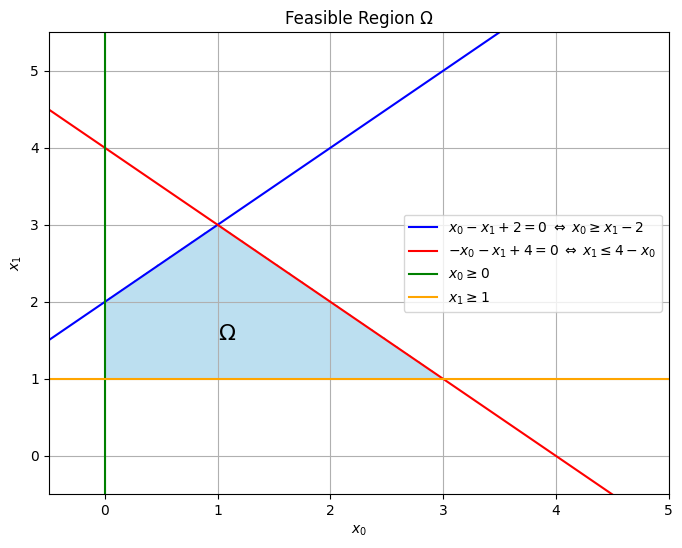

In [19]:
x0_vals = np.linspace(-1, 5, 400)
x1_vals = np.linspace(-1, 6, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)

# Constraints
c1 = (X0 - X1 + 2) >= 0     # x0 >= x1 - 2
c2 = (-X0 - X1 + 4) >= 0    # x1 <= 4 - x0
c3 = X0 >= 0                # x0 >= 0
c4 = X1 >= 1                # x1 >= 1

# Feasible region
feasible = c1 & c2 & c3 & c4

plt.figure(figsize=(8, 6))
plt.title("Feasible Region Ω")

plt.contourf(X0, X1, feasible, levels=[0.5, 1], colors=["#a0d2eb"], alpha=0.7)

plt.plot(x0_vals, x0_vals + 2, label=r"$x_0 - x_1 + 2 = 0 \;\Leftrightarrow\; x_0 \geq x_1 - 2$", color='blue')
plt.plot(x0_vals, -x0_vals + 4, label=r"$-x_0 - x_1 + 4 = 0 \;\Leftrightarrow\; x_1 \leq 4 - x_0$", color='red')
plt.axvline(0, label=r"$x_0 \geq 0$", color='green')
plt.axhline(1, label=r"$x_1 \geq 1$", color='orange')

plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5.5)
plt.grid(True)
plt.legend()
plt.text(1, 1.5, r"$\Omega$", fontsize=16, color="black")

plt.show()

### 2. $is\_feasible$

Write a function $is\_feasible$ that checks if a point $x$ is feasible (this function should return a boolean).

I will call this function $is\_feasible3$ since so that we don't have any issue with the same functions of the previous exercises.

It would be better to rename also all the constraint function but there shouldn't be any issue anyway, since they will be overwritten.

In [20]:
def c1(x):
    return x[0] - x[1] + 2

def c2(x):
    return -x[0] - x[1] + 4

def c3(x):
    return x[0]

def c4(x):
    return x[1] - 1

def is_feasible3(x):
    return (c1(x) >= 0 and c2(x) >= 0 and c3(x) >= 0 and c4(x) >= 0)

### 3. $active\_set$

Write a function $active\_set$ that returns the indices of active constraints at a point $x ∈ \mathbb{R}^2$.

In [21]:
def active_set(x, tol=1e-8):
    active = []
    if abs(c1(x)) < tol:
        active.append(1)
    if abs(c2(x)) < tol:
        active.append(2)
    if abs(c3(x)) < tol:
        active.append(3)
    if abs(c4(x)) < tol:
        active.append(4)
    return active

### 4. Test the functions $is\_feasible and $active\_set$ on the following points.

- $x = (0,0)$
- $x = (0,4)$
- $x = (1,3)$

In [22]:
points = {
    "x1 = (0, 0)": (0, 0),
    "x2 = (0, 4)": (0, 4),
    "x3 = (1, 3)": (1, 3)
}

for name, x in points.items():
    feasible = is_feasible3(x)
    active = active_set(x)
    print(f"{name}")
    print(f"  Feasible? {feasible}")
    print(f"  Active constraints: {active}")
    print()

x1 = (0, 0)
  Feasible? False
  Active constraints: [3]

x2 = (0, 4)
  Feasible? False
  Active constraints: [2, 3]

x3 = (1, 3)
  Feasible? True
  Active constraints: [1, 2]



### 5. $is\_feasible\_direction$

Write a function $is\_feasible\_direction$ that checks if a direction $d ∈ \mathbb{R}^2$ is in the set of linearised feasible directions at a feasible point $x$ (this function should return a boolean).

Let $\Omega \subset \mathbb{R}^n$ be a feasible region defined by inequality and equality constraints.

We say that a vector $d \in \mathbb{R}^n$ is a feasible direction at point $x \in \Omega$ if, when we move a small amount along $d$ starting from $x$, we remain in the feasible region (at least to first order).

Formally, the set of linearized feasible directions at a feasible point $x$ is:

$$
F(x) = \left\{ x \in \mathbb{R}^2, d \in \mathbb{R}^n \;\middle|\;
\begin{aligned}
\nabla c_i(x)^T d &\geq 0 \quad \text{for } i \in A(x) \cap I \\
\nabla c_i(x)^T d &= 0 \quad \text{for } i \in E
\end{aligned}
\right\}
$$

Where:

- $A(x)$: set of active constraints at $x$
- $I$: set of inequality constraints
- $E$: set of equality constraints (here is empty, so we can ignore that part)

So, for our case (only inequality constraints), a direction $d$ is feasible if:

> For every active constraint at $x$, the directional derivative $\nabla c_i(x)^T d \geq 0$

This makes sure that moving along $d$ doesn't violate active constraints.

To implement this, given a point $x \in \mathbb{R}^2$ we do:
- Compute the active set $A(x)$
- For each active constraint $c_i$, check that $\nabla c_i(x)^T d \geq 0$
- If all checks pass, return `True`, otherwise, return `False`

In [23]:
def grad_c1(x):
    return np.array([1, -1])

def grad_c2(x):
    return np.array([-1, -1])

def grad_c3(x):
    return np.array([1, 0])

def grad_c4(x):
    return np.array([0, 1])

def is_feasible_direction(x, d):
    grads = {
        1: grad_c1(x),
        2: grad_c2(x),
        3: grad_c3(x),
        4: grad_c4(x),
    }
    A = active_set(x)
    for i in A:
        if np.dot(grads[i], d) < 0:
            return False
    return True

### 6. Test the function $is\_feasible\_direction on the following points and directions.

Points:

- $x = (0,0)$
- $\bar{x} = (1,3)$

Directions:

- $d = (0,−1)$
- $d = (1,0)$
- $d = (0,1)$

In [24]:
x = (0, 0)
x_bar = (1, 3)

directions = {
    "d = (0, -1)": np.array([0, -1]),
    "d = (1, 0)":  np.array([1, 0]),
    "d = (0, 1)":  np.array([0, 1])
}

for name, d in directions.items():
    print(f"Testing direction {name}")
    print(f"  At x = (0, 0):       {is_feasible_direction((0, 0), d)}")
    print(f"  At x̄ = (1, 3):       {is_feasible_direction((1, 3), d)}")
    print()

Testing direction d = (0, -1)
  At x = (0, 0):       True
  At x̄ = (1, 3):       True

Testing direction d = (1, 0)
  At x = (0, 0):       True
  At x̄ = (1, 3):       False

Testing direction d = (0, 1)
  At x = (0, 0):       True
  At x̄ = (1, 3):       False



In [25]:
print("Optimization Methods SP25 - Assignment 6")
print("Lorenzo Galli - Università della Svizzera Italiana (USI)")

Optimization Methods SP25 - Assignment 6
Lorenzo Galli - Università della Svizzera Italiana (USI)
